### Q1

### Part A

In [248]:
import math
import random
import sklearn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

dataset = pd.read_csv("input\P1\dataset.csv")
dataset.head(25)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,2013-06-30,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,2013-06-30,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,2013-06-30,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [249]:
dataset.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [250]:
dataset.shape

(7752, 25)

In [251]:
dataset.tail(25)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7727,3.0,2017-08-30,23.0,17.0,26.563343,78.826996,27.718406,17.772592,5.911668,14.091323,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,4458.824707,27.7,16.8
7728,4.0,2017-08-30,22.6,16.7,38.991627,95.432045,24.562156,15.999018,5.608833,120.654731,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,4448.519043,26.9,17.0
7729,5.0,2017-08-30,22.9,16.3,36.733143,88.184517,25.855472,17.033742,5.812507,116.093668,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,4445.645996,27.9,15.7
7730,6.0,2017-08-30,23.0,17.9,26.961586,81.591942,27.191402,17.795103,6.467678,53.966684,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.145700,4459.023438,28.1,17.5
7731,7.0,2017-08-30,23.5,16.6,32.614983,91.536095,25.233300,18.248183,5.036397,118.892933,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,4440.394043,27.8,18.6
7732,8.0,2017-08-30,22.5,16.5,23.428869,83.089272,26.804746,18.047354,6.742729,64.152702,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.562900,4438.943848,27.5,16.6
7733,9.0,2017-08-30,23.3,15.8,29.709179,90.403275,25.799004,17.383095,5.805489,108.981960,...,0.000000,0.000000,0.000000,37.4967,126.826,50.9312,0.412500,4471.100586,27.4,16.4
7734,10.0,2017-08-30,21.4,14.1,25.229910,86.536469,25.878358,16.993471,6.542819,69.655613,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.178200,4371.684570,26.2,15.0
7735,11.0,2017-08-30,23.0,16.5,28.319260,82.678833,27.354836,17.934175,6.031364,44.483636,...,0.000000,0.000000,0.000000,37.5372,127.085,28.7000,0.623300,4466.529297,27.4,16.2
7736,12.0,2017-08-30,23.8,15.4,25.464573,78.012566,26.860758,17.560685,7.411646,19.791088,...,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.593100,4503.517578,25.8,16.5


### Calculate NaN

In [252]:
print(dataset.isna().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [253]:
dataset.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

### missing values

In [254]:
for i in dataset.columns:
    if i != 'Date':
        dataset[i].fillna(dataset[i].mean(), inplace=True)
dataset.isna().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Convert date to numeric

In [255]:
dataset['Date'] = dataset['Date'].str.replace("-","")
dataset['Date']=pd.to_numeric(dataset['Date'])
dataset.Date /=10000
dataset['Date'].fillna(dataset['Date'].mean(), inplace=True)
dataset.Date = dataset.Date.astype(int)
dataset.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [256]:
dataset.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [257]:
dataset.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### removing unneeded columns

In [258]:
for i in dataset.columns:
    print(i,dataset[i].max(), dataset[i].min())
dataset.drop(columns="LDAPS_PPT1", inplace=True)
# dataset.drop(columns="LDAPS_PPT2", inplace=True)
# dataset.drop(columns="LDAPS_PPT3", inplace=True)
dataset.drop(columns="LDAPS_PPT4", inplace=True)

station 25.0 1.0
Date 2017 2013
Present_Tmax 37.6 20.0
Present_Tmin 29.9 11.3
LDAPS_RHmin 98.5247345 19.79466629
LDAPS_RHmax 100.0001526 58.93628311
LDAPS_Tmax_lapse 38.54225522 17.62495378
LDAPS_Tmin_lapse 29.61934244 14.27264631
LDAPS_WS 21.85762099 2.882579625
LDAPS_LH 213.4140062 -13.60321209
LDAPS_CC1 0.967277328 0.0
LDAPS_CC2 0.96835306 0.0
LDAPS_CC3 0.983788755 0.0
LDAPS_CC4 0.974709524 0.0
LDAPS_PPT1 23.70154408 0.0
LDAPS_PPT2 21.62166078 0.0
LDAPS_PPT3 15.84123484 0.0
LDAPS_PPT4 16.65546921 0.0
lat 37.645 37.4562
lon 127.135 126.826
DEM 212.335 12.37
Slope 5.17823 0.0984746
Solar radiation 5992.895996 4329.520508
Next_Tmax 38.9 17.4
Next_Tmin 29.8 11.3


### normalization

In [259]:
max_label = dataset['Next_Tmax']
min_label = dataset['Next_Tmin']
pre = dataset.drop(columns='Next_Tmax')
data_x = pre.drop(columns='Next_Tmin')
normalized_x = (data_x - data_x.mean()) / data_x.std()
normalized_x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT2,LDAPS_PPT3,lat,lon,DEM,Slope,Solar radiation
0,-1.664208,-1.414305,-0.361302,-0.759480,0.102509,0.383053,-0.524855,-0.216649,-0.128374,0.206953,...,-0.592597,-0.628972,-0.664772,-0.276472,-0.240621,1.189209,-0.005000,2.772064,1.114932,1.517837
1,-1.525524,-1.414305,0.721037,-0.676252,-0.308007,0.311566,0.080890,0.223833,-0.646952,-0.314820,...,-0.406173,-0.638014,-0.677419,-0.276472,-0.240621,1.189209,0.511144,-0.315137,-0.542123,1.229870
2,-1.386840,-1.414305,0.619568,0.031186,-0.552778,-0.614942,0.162926,0.451181,-0.441575,-1.249202,...,-0.383985,-0.458814,-0.620535,-0.276472,-0.240621,0.652979,0.838456,-0.526184,-0.723086,1.216456
3,-1.248156,-1.414305,0.754861,0.072800,0.101419,1.132981,0.031090,-0.079869,-0.666204,0.095991,...,-0.506515,-0.631137,-0.651654,-0.276472,-0.240621,1.991568,0.385255,-0.297569,0.932364,1.201098
4,-1.109472,-1.414305,0.551922,-0.551410,-0.040096,0.248749,-0.170314,-0.011186,-0.627113,1.354322,...,-0.413089,-0.559954,-0.510325,-0.276472,-0.240621,0.118735,1.807800,-0.494290,-0.548398,1.207127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386840,1.414305,-2.187751,-2.548883,-2.056458,-1.328040,-1.111994,-2.029548,-0.436654,0.284603,...,-1.071009,-1.277971,-1.182042,-0.276472,-0.240621,-0.149380,-1.263889,-0.852626,-0.803863,-2.092905
7748,1.525524,1.414305,-2.187751,-2.299199,-2.241474,-1.548084,-0.887605,-2.047612,-0.255404,-0.454719,...,-1.094655,-1.277971,-1.182042,-0.276472,-0.240621,-0.417495,-1.037289,-0.821160,-0.755046,-2.104417
7749,1.664208,1.414305,-2.221574,-2.424041,-2.317354,-1.555242,-0.570743,-2.137824,0.088066,-1.591295,...,-1.153429,-1.277971,-1.178897,-0.276472,-0.240621,-0.417495,-0.269367,-0.778993,-0.719292,-2.074191
7750,0.000000,0.000000,-3.303914,-4.962497,-2.532354,-4.113177,-4.087593,-3.958890,-1.939632,-2.267353,...,-1.386554,-1.277971,-1.182042,-0.276472,-0.240621,-1.758070,-2.082167,-0.911904,-0.845401,-2.358060


### outlier detection using K-Means

In [214]:
def merging(start: np.ndarray, end: np.ndarray, metric, convergence_ratio=0.01) -> bool:
    x_check = start - end
    if convergence_ratio > metric(x_check):
        return True
    return False
def predict(self, X):
    self.centroids = np.zeros((self.K, self.n_features))
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
    for i in range(self.K):
        self.centroids[i, :] = X_train[random.randint(0, int(460) - 1), :]
def KMeans(X_train: pd.DataFrame, ClusterCount, iteration, ConvergenceRatio, DistanceMetric) -> list:
    init_centers = np.zeros((ClusterCount, X_train.shape[1]))
    sum_value = 0
    if DistanceMetric == 'CityBlock':
        metric = CityBlock
    elif DistanceMetric == 'Euclidean':
        metric = Euclidian
    else:
        return -1
    for i in range(ClusterCount):
        init_centers[i, :] = X_train[random.randint(0, X_train.shape[0] - 1), :]
    def all_labels(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X.iloc[cluster,:], axis=0)
            centroids[cluster_idx] = cluster_mean
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.centroids = np.zeros((self.K, self.n_features))
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    while True:
        sum_value += 1
        cluster_lists = []
        for i in range(ClusterCount):
            cluster_lists.append(set())
        for i in range(X_train.shape[0]):
            evaluation_metric = []
            for center_index in range(ClusterCount):
                evaluation_metric.append(metric(X_train[i, :] - init_centers[center_index, :]))
            evaluation_metric = np.array(evaluation_metric)
            min_cluster_index = np.where(evaluation_metric == evaluation_metric.min())[0][0]
            cluster_lists[min_cluster_index].add(i)
        new_centers = np.zeros((ClusterCount, X_train.shape[1]), dtype=float)
        for i in range(ClusterCount):
            sum_vectors = np.zeros(X_train.shape[1])
            for row_number in cluster_lists[i]:
                sum_vectors += X_train[row_number, :]
            if len(cluster_lists[i]) != 0:
                new_centers[i, :] = sum_vectors / len(cluster_lists[i])
            else:
                new_centers[i, :] = X_train[random.randint(0, X_train.shape[1] - 1), :] 
        if merging(init_centers, new_centers, metric, convergence_ratio=ConvergenceRatio):
            init_centers = new_centers
            break
        init_centers = new_centers
        if sum_value >= iteration:
            break
    return init_centers
from numpy import array
def d(center, data):
    return np.sqrt(np.sum(((center - data) ** 2), axis=1))

def calculate_purity(y, y_specific):
    unique_values = np.unique(y)
    purity = 0
    for val in unique_values:
        cluster_index = np.where(array(y) == val)[0]
        most_frequent_label = y_specific[cluster_index].mode()[0]
        purity += y_specific[cluster_index][y_specific[cluster_index] == most_frequent_label].shape[0]
    purity /= len(y)
    return round(purity, 3)

def label_handler(d, data, center):
    result = []
    for center in center:
        result.append(d(center, data))
    return [np.argmin(x) for x in array(result).T], array(result).T.min(axis=1)

def calculate_entropy(y, predict):
    u,e = np.unique(y),0
    for i in u:
        e += -(len(np.where(array(y) == i)[0]) / len(y)) * np.sum(
            list(map(lambda x: (x / len(np.where(array(y) == i)[0])) * np.log2(
                x / len(np.where(array(y) == i)[0])), predict[np.where(
                array(y) == i)[0]].value_counts().tolist())))
    return round(e, 3)

def calculate_acc(x, predict):
    labels, _ = label_handler(d, x, answer)
    u,count = np.unique(labels),0
    for val in u:
        count += predict[np.where(array(
            labels) == val)[0]][predict[np.where(array(
            labels) == val)[0]] == predict[np.where(array(labels) == val)[0]].mode()[0]].shape[0]
    return round(count / x.shape[0], 3)

def CityBlock(input: np.ndarray):
    return np.sum(np.abs(input))

def Euclidian(input: np.ndarray):
    return math.sqrt(np.sum(np.power(input, 2)))

def estimator(array: list):
    return np.sum(np.power(np.array(array), 2))

def distance_for_clusters(input: np.ndarray, points: np.ndarray, d):
    result_array = []
    for i in range(points.shape[0]):
        result_array.append(d(input - points[i, :]))
    return np.array(result_array).min(), np.where(result_array == np.array(result_array))[0][0]

def sample_handler(input_val):
    for i, j in input_val.iterrows():
        clusters[centroids._closest_centroid(j, centroids)].append(i)
    return clusters

result_part_c , K_array = [],[1,2,3,4,5,8,10,12,13]
for value in K_array:
    print(value)
    points,distances = KMeans(normalized_x.to_numpy(), value,30,0.01,DistanceMetric = 'CityBlock'),[]
    for i in range(normalized_x.to_numpy().shape[0]):
        mininmum, index = distance_for_clusters(normalized_x.to_numpy()[i, :], points, Euclidian)
        distances.append(mininmum)
    result_part_c.append(estimator(distances))


1
2
3
4
5
8
10
12
13


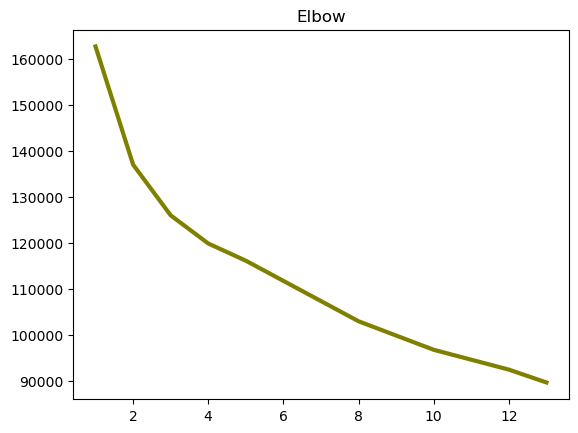

In [215]:
print("")
plt.title('Elbow')
plt.plot(K_array, result_part_c, color= "olive" , linewidth = "3")
plt.show()

Text(0.5, 1.0, 'K=10')

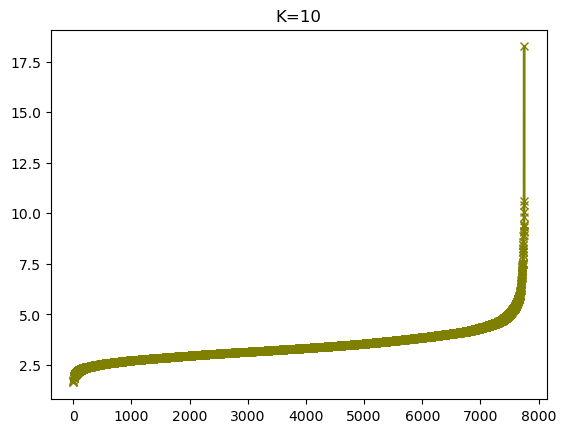

In [260]:
points,distances = KMeans(normalized_x.to_numpy(), 10, 30, 0.01,DistanceMetric = 'CityBlock'),[]
for i in range(normalized_x.to_numpy().shape[0]):
    minimum, index = distance_for_clusters(normalized_x.to_numpy()[i, :], points, Euclidian)
    distances.append(minimum)
plt.plot(np.arange(1, normalized_x.to_numpy().shape[0] + 1), sorted(distances
                                                        ), 'bx-', linewidth = 2, color = "olive")
plt.title('K=10')

### removing outliers

In [261]:
count,optimal_limit = 0, 9.8
for value in range(normalized_x.to_numpy().shape[0]):
    if value < 7600:
        limit, _ = distance_for_clusters(normalized_x.to_numpy()[value, :], points, Euclidian)
    #     print(limit)
        if limit > optimal_limit:
            count += 1
            normalized_x.drop(value, axis=0, inplace=True)
            max_label.drop(value, axis=0, inplace=True)
            min_label.drop(value, axis=0, inplace=True)
print("Outlier percentage: ", count / normalized_x.to_numpy().shape[0] * 100 )
print("outliers deleted successfuly ... ")

Outlier percentage:  0.05162622612287042
outliers deleted successfuly ... 


### Part B:

### 6300 sample for train (79%) & 1448 for test (21%)

In [218]:
normalized_x.shape

(7752, 21)

In [263]:
main_x = np.copy(normalized_x)
main_max_label = np.copy(max_label)
main_min_label = np.copy(min_label)

max_label = np.array(max_label).reshape(-1,1)
min_label = np.array(min_label).reshape(-1,1)

all_matrix = np.hstack((np.array(normalized_x),max_label))
print(all_matrix.shape)
#_____________________________________
#shuffle
# for i in range(100):
#     np.random.shuffle(all_matrix)
#_____________________________________
#train_data
train_data_set = all_matrix[0:6300,:]
x_train = train_data_set[:,0:21]
y_train = train_data_set[:,21:]
# #_____________________________________
# #test_data
test_data_set = all_matrix[6300:,:]
x_test = test_data_set[:,0:21]
y_test = test_data_set[:,21:]

print("x_train: ",x_train.shape,"     y_train: ", y_train.shape )
print("x_test: ",x_test.shape,"     y_test: ", y_test.shape )

SGDReg =linear_model.SGDRegressor(
   max_iter = 90000,penalty = "l2",loss = 'squared_loss',tol = 0, average = True,warm_start=True)
SGDReg.fit(x_train, y_train)
y_pred = SGDReg.predict(x_test)
x_dim = np.array([i for i in range (x_test.shape[0])])

(7748, 22)
x_train:  (6300, 21)      y_train:  (6300, 1)
x_test:  (1448, 21)      y_test:  (1448, 1)


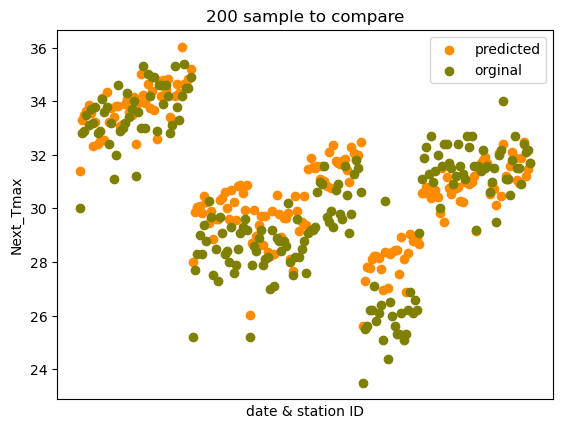

In [220]:
plt.scatter(x_dim[0:200], y_pred[0:200],color = 'darkorange',label = "predicted")
plt.scatter(x_dim[0:200], y_test[0:200],color= 'olive',label = "orginal")
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("200 sample to compare")
plt.legend()

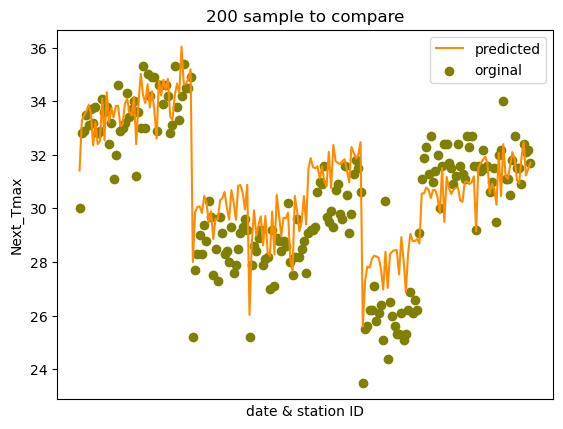

In [221]:
plt.plot(x_dim[0:200], y_pred[0:200],color = 'darkorange',label = "predicted")
plt.scatter(x_dim[0:200], y_test[0:200],color= 'olive',label = "orginal")
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("200 sample to compare")
plt.legend()

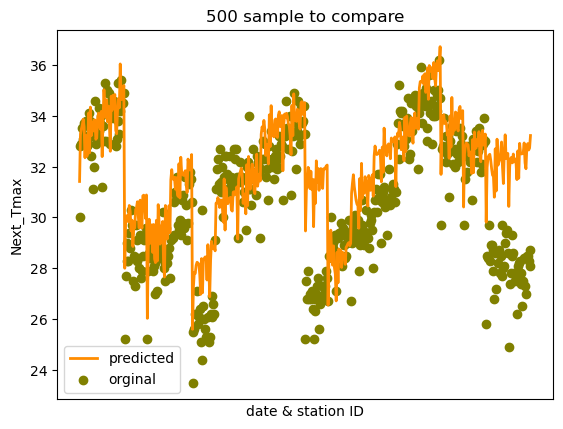

In [222]:
plt.plot(x_dim[0:500], y_pred[0:500],color = 'darkorange',label = "predicted",linewidth = 2)
plt.scatter(x_dim[0:500], y_test[0:500],color= 'olive',label = "orginal")
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("500 sample to compare")
plt.legend()

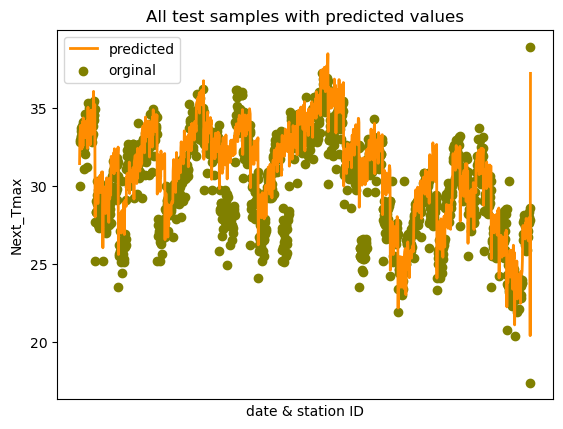

In [223]:
plt.plot(x_dim, y_pred,color = 'darkorange',label = "predicted",linewidth=2)
plt.scatter(x_dim, y_test,color= 'olive',label = "orginal" ,)
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("All test samples with predicted values")
plt.legend()

### SSE metric

In [224]:
print("SSE:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])
print("MSE:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True))

SSE: 5688.501285636052
MSE: 3.9177006099421843


### train data for Next_Tmin ... 

(7752, 22)
x_train:  (6300, 21)      y_train:  (6300, 1)
x_test:  (1452, 21)      y_test:  (1452, 1)


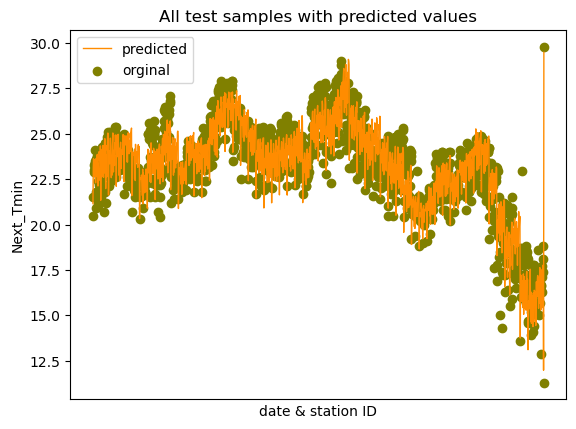

In [225]:

min_label = np.array(min_label).reshape(-1,1)
all_matrix = np.hstack((np.array(normalized_x),min_label))
print(all_matrix.shape)
# #_____________________________________
# #shuffle
# for i in range(100):
#     np.random.shuffle(all_matrix)
# #_____________________________________
#train_data
train_data_set = all_matrix[0:6300,:]
x_train = train_data_set[:,0:21]
y_train = train_data_set[:,21:]
#_____________________________________
#test_data
test_data_set = all_matrix[6300:,:]
x_test = test_data_set[:,0:21]
y_test = test_data_set[:,21:]

print("x_train: ",x_train.shape,"     y_train: ", y_train.shape )
print("x_test: ",x_test.shape,"     y_test: ", y_test.shape )

SGDReg =linear_model.SGDRegressor(
   max_iter = 90000,penalty = "l2",loss = 'squared_loss',tol = 0, average = True,warm_start=True)
SGDReg.fit(x_train, y_train)
y_pred = SGDReg.predict(x_test)
x_dim = np.array([i for i in range (x_test.shape[0])])
plt.plot(x_dim, y_pred,color = 'darkorange',label = "predicted",linewidth=1)
plt.scatter(x_dim, y_test,color= 'olive',label = "orginal" )
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmin')
plt.title("All test samples with predicted values")
plt.legend()

In [226]:
print("SSE:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])
print("MSE:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True))

SSE: 1273.234034787697
MSE: 0.8768829440686619


### Part D:

### train test split with shuffling

In [264]:
min_label = np.array(min_label).reshape(-1,1)
all_matrix_new = np.hstack((all_matrix,min_label))
print(all_matrix_new.shape)
# # #_____________________________________
# # #shuffle
# for i in range(100):
#     np.random.shuffle(all_matrix_new)
# # #_____________________________________
# #train_data
train_data_set = all_matrix_new[0:6300,:]
x_train = train_data_set[:,0:21]
y_train = train_data_set[:,21:]
# #_____________________________________
# #test_data
test_data_set = all_matrix_new[6300:,:]
x_test = test_data_set[:,0:21]
y_test = test_data_set[:,21:]

print("x_train: ",x_train.shape,"     y_train: ", y_train.shape )
print("x_test: ",x_test.shape,"     y_test: ", y_test.shape )



(7748, 23)
x_train:  (6300, 21)      y_train:  (6300, 2)
x_test:  (1448, 21)      y_test:  (1448, 2)


### First approach: Using Library

In [265]:
sgd = linear_model.SGDRegressor(
   max_iter = 90000,penalty = "l2",loss = 'squared_loss',tol = 0, average = True,warm_start=True)
model = sklearn.multioutput.MultiOutputRegressor(estimator=sgd)
model.fit(x_train,y_train)
score = model.score(x_train,y_train) 
print("Training score:", score)
y_pred = model.predict(x_test)

print("SSE:",sklearn.metrics.mean_squared_error(
    y_test[:,0], y_pred[:,0], sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])
print("MSE:",sklearn.metrics.mean_squared_error(
    y_test[:,0], y_pred[:,0], sample_weight=None, multioutput='uniform_average', squared=True))


Training score: 0.8028419704273995
SSE: 5485.485776877803
MSE: 3.7883189066835654


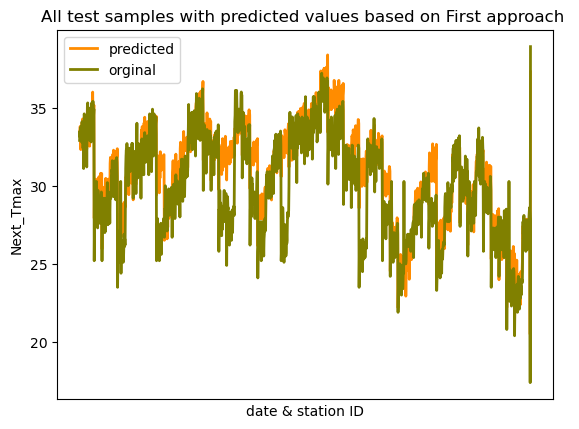

In [266]:
plt.plot(x_dim, y_pred[:,0],color = 'darkorange',label = "predicted", linewidth=2)
plt.plot(x_dim, y_test[:,0],color= 'olive',label = "orginal" , linewidth=2)
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("All test samples with predicted values based on First approach ")
plt.legend()

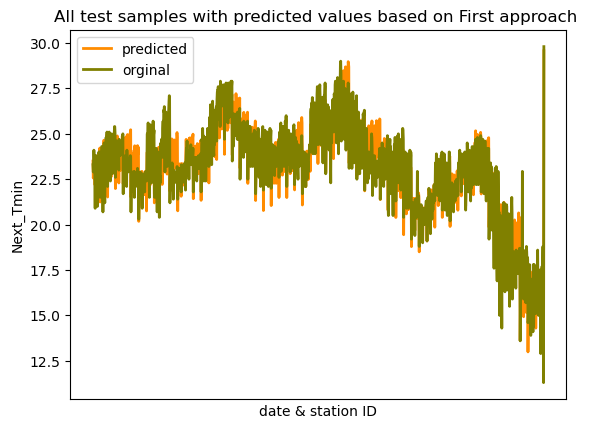

In [267]:
plt.plot(x_dim, y_pred[:,1],color = 'darkorange',label = "predicted",linewidth=2)
plt.plot(x_dim, y_test[:,1],color= 'olive',label = "orginal" , linewidth=2)
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmin')
plt.title("All test samples with predicted values based on First approach ")
plt.legend()

In [231]:
print("Results for First approach: Using Library ")
print("___________________________________________________")
print("SSE for Next_Tmin:",sklearn.metrics.mean_squared_error(
    y_test[:,0], y_pred[:,0], sample_weight=None, multioutput='uniform_average', squared=True))
print("SSE for Next_Tmax:",sklearn.metrics.mean_squared_error(
    y_test[:,1], y_pred[:,1], sample_weight=None, multioutput='uniform_average', squared=True))
print("Avg SSE for both:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True))

Results for First approach: Using Library 
___________________________________________________
SSE for Next_Tmin: 0.8629367078247244
SSE for Next_Tmax: 0.8599111390345756
Avg SSE for both: 0.86142392342965


### Second approach: MultiOutputRegression from scratch

In [268]:
min_label = np.array(min_label).reshape(-1,1)
all_matrix_new = np.hstack((all_matrix,min_label))
print(all_matrix_new.shape)
# # #_____________________________________
# # #shuffle
# for i in range(100):
#     np.random.shuffle(all_matrix_new)
# # #_____________________________________
# #train_data
train_data_set = all_matrix_new[0:6300,:]
x_train = train_data_set[:,0:21]
y_train = train_data_set[:,21:]
# #_____________________________________
# #test_data
test_data_set = all_matrix_new[6300:,:]
x_test = test_data_set[:,0:21]
y_test = test_data_set[:,21:]

print("x_train: ",x_train.shape,"     y_train: ", y_train.shape )
print("x_test: ",x_test.shape,"     y_test: ", y_test.shape )



(7748, 23)
x_train:  (6300, 21)      y_train:  (6300, 2)
x_test:  (1448, 21)      y_test:  (1448, 2)


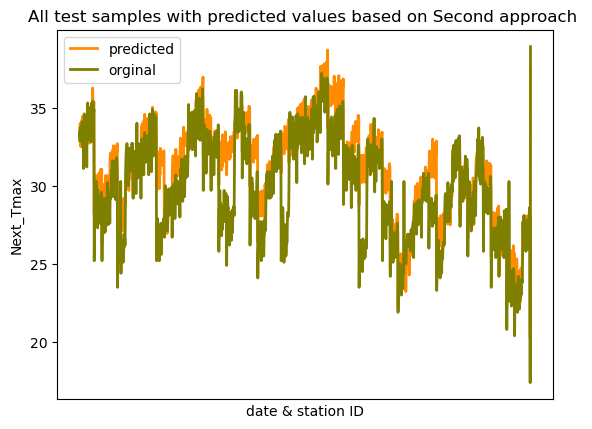

In [269]:
iter_num = 10000
LR = 0.00001
X = np.column_stack([np.ones(x_train.shape[0]), x_train])
w = np.random.rand(X.shape[1], y_train.shape[1]) - 0.4
for i in range(iter_num):
#     gradient = X.T @ ((X @ weights) - y_train)
    w -= LR * (X.T @ ((X @ w) - y_train))
pre = np.column_stack([np.ones(x_test.shape[0]), x_test])
y_pred =  pre @ w 


plt.plot(x_dim, y_pred[:,0],color = 'darkorange',label = "predicted", linewidth=2)
plt.plot(x_dim, y_test[:,0],color= 'olive',label = "orginal", linewidth=2 )
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("All test samples with predicted values based on Second approach ")
plt.legend()

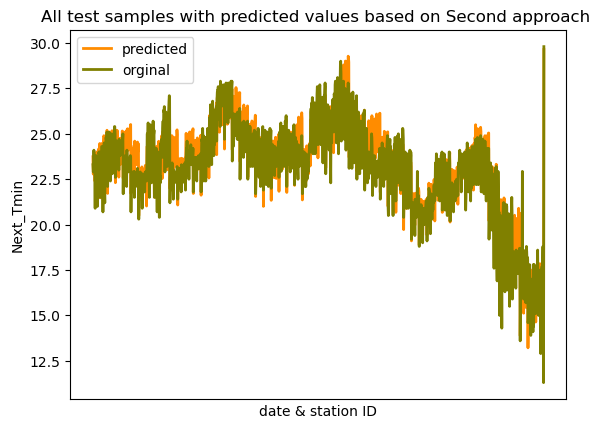

In [270]:
plt.plot(x_dim, y_pred[:,1],color = 'darkorange',label = "predicted", linewidth=2)
plt.plot(x_dim, y_test[:,1],color= 'olive',label = "orginal" ,  linewidth=2)
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmin')
plt.title("All test samples with predicted values based on Second approach ")
plt.legend()

In [235]:
print("Results for Second approach: MultiOutputRegression from scratch ")
print("___________________________________________________")
print("MSE for Next_Tmin:",sklearn.metrics.mean_squared_error(
    y_test[:,0], y_pred[:,0], sample_weight=None, multioutput='uniform_average', squared=True))
print("MSE for Next_Tmax:",sklearn.metrics.mean_squared_error(
    y_test[:,1], y_pred[:,1], sample_weight=None, multioutput='uniform_average', squared=True))
print("Avg MSE for both:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True))
print("___________________________________________________")
print("SSE for Next_Tmin:",sklearn.metrics.mean_squared_error(
    y_test[:,0], y_pred[:,0], sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])
print("SSE for Next_Tmax:",sklearn.metrics.mean_squared_error(
    y_test[:,1], y_pred[:,1], sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])
print("Avg SSE for both:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])

Results for Second approach: MultiOutputRegression from scratch 
___________________________________________________
MSE for Next_Tmin: 0.9602937424808012
MSE for Next_Tmax: 0.960293742480801
Avg MSE for both: 0.960293742480801
___________________________________________________
SSE for Next_Tmin: 1394.3465140821233
SSE for Next_Tmax: 1394.3465140821231
Avg SSE for both: 1394.3465140821231


### Part F

In [236]:
X = np.column_stack([np.ones(x_train.shape[0]), x_train])
w = np.linalg.inv(X.T @ X) @ X.T @ y_train
y_pred = np.column_stack([np.ones(x_test.shape[0]), x_test]) @ w

print("Results for normal equation: ")
print("___________________________________________________")
print("MSE for both:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True))
print("___________________________________________________")
print("SSE for both:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])

Results for normal equation: 
___________________________________________________
MSE for both: 0.9602937424808082
___________________________________________________
SSE for both: 1394.3465140821336


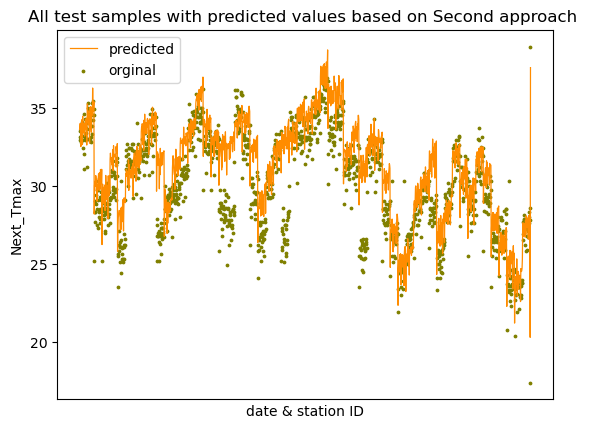

In [272]:
plt.plot(x_dim, y_pred[:,0],color = 'darkorange',label = "predicted",linewidth=0.9)
plt.scatter(x_dim, y_test[:,0],color= 'olive',label = "orginal" , s= 3)
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("All test samples with predicted values based on Second approach ")
plt.legend()

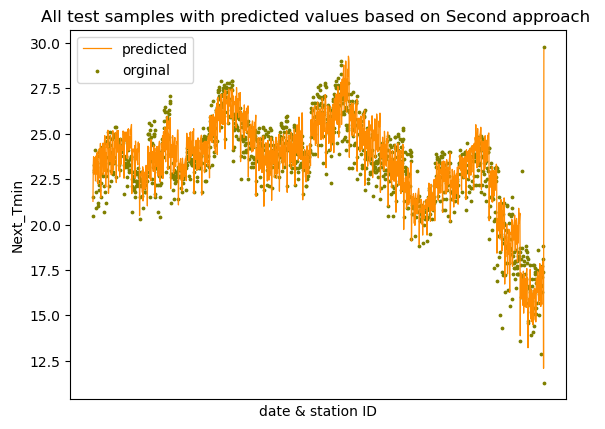

In [238]:
plt.plot(x_dim, y_pred[:,1],color = 'darkorange',label = "predicted",linewidth=0.9)
plt.scatter(x_dim, y_test[:,1],color= 'olive',label = "orginal" , s= 3)
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmin')
plt.title("All test samples with predicted values based on Second approach ")
plt.legend()

### Part g

### 6300 sample for train (79%) & 1448 for test (21%)

In [273]:
main_x = np.copy(normalized_x)
main_max_label = np.copy(max_label)
main_min_label = np.copy(min_label)

max_label = np.array(max_label).reshape(-1,1)
all_matrix = np.hstack((np.array(normalized_x),max_label))
print(all_matrix.shape)
#_____________________________________
#shuffle
# for i in range(100):
#     np.random.shuffle(all_matrix)
#_____________________________________
#train_data
train_data_set = all_matrix[0:6300,:]
x_train = train_data_set[:,0:21]
y_train = train_data_set[:,21:]
# #_____________________________________
# #test_data
test_data_set = all_matrix[6300:,:]
x_test = test_data_set[:,0:21]
y_test = test_data_set[:,21:]

print("x_train: ",x_train.shape,"     y_train: ", y_train.shape )
print("x_test: ",x_test.shape,"     y_test: ", y_test.shape )


(7748, 22)
x_train:  (6300, 21)      y_train:  (6300, 1)
x_test:  (1448, 21)      y_test:  (1448, 1)


In [274]:
def KNeighborsRegressor(x_train,y_train,x_test,k):
    m,n = x_train.shape
    m_test,_ = x_test.shape
    Y_predict = np.zeros(m_test)
    for i in range( m_test ) :
        neighbors = np.zeros(k)
        distances = np.zeros(m)
        for j in range(m) :
            distances[j] = np.sqrt( np.sum( np.square( x_test[i] - x_train[j] ) ) )
        inds = distances.argsort()
        Y_train_sorted = y_train[inds]
        neighbors = Y_train_sorted[:k]
        Y_predict[i] = np.mean(neighbors)
    return Y_predict

# y_pred = KNeighborsRegressor(x_train,y_train,x_test,k)

1
2
3
4
5
6
7
8
9
10



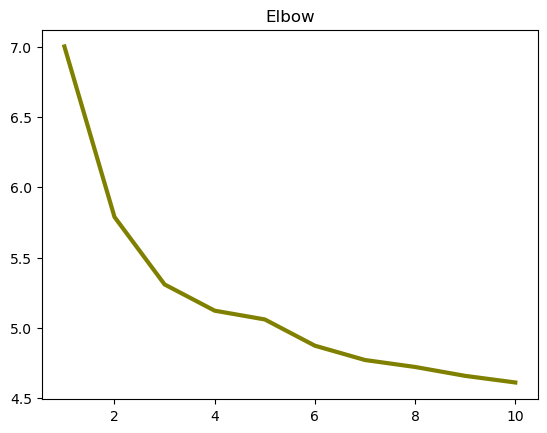

In [275]:
 K_array = [1,2,3,4,5,6,7,8,9,10]
result = []
for value in K_array:
    print(value)
    result.append(sklearn.metrics.mean_squared_error(
    y_test,KNeighborsRegressor(x_train,y_train,x_test,value),
        sample_weight=None, multioutput='uniform_average', squared=True))
print("")
plt.title('Elbow')
plt.plot(K_array, result, color= "olive" , linewidth = "3")
plt.show()

### K = 5 is the best K to train the model ...

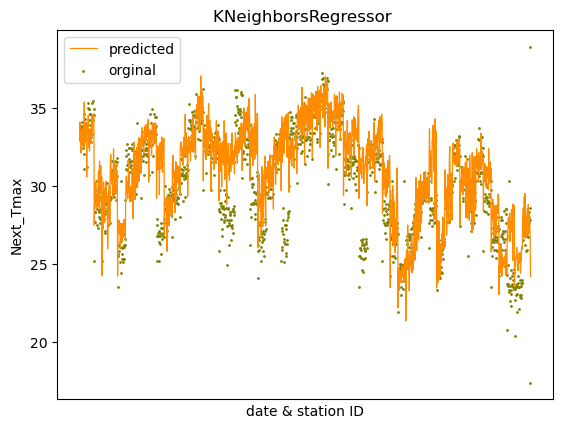

In [276]:
y_pred = KNeighborsRegressor(x_train,y_train,x_test,5)
plt.plot(x_dim, y_pred,color = 'darkorange',label = "predicted",linewidth=0.9)
plt.scatter(x_dim, y_test,color= 'olive',label = "orginal" , s= 1)
plt.tick_params(labelbottom=False,bottom=False) 
plt.xlabel('date & station ID')
plt.ylabel('Next_Tmax')
plt.title("KNeighborsRegressor ")
plt.legend()

In [277]:
print("Results for KNeighborsRegressor ")
print("___________________________________________________")
print("MSE:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True))
print("SSE:",sklearn.metrics.mean_squared_error(
    y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)*y_test.shape[0])

Results for KNeighborsRegressor 
___________________________________________________
MSE: 5.0593043438076055
SSE: 7325.872689833413
